#Bootcamp Ciencia de Datos e Inteligencia Artificial 
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning


## Estudiante: **Priscila Elías**


¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 3! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Esta actividad constará de dos partes. Revisa con cuidado cada una de las instrucciones y procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa. 

¡Éxito! 

## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_, 
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento, 
  - predecirás con conjunto de pruebas.
* Aplicarás cuadros de confusión y medirás la precisión.
* Graficarás mapas de calor a partir del cuadro de confusión.
* Utilizarás métricas MSE, RMSE y R2.

## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing 

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_, 
  - estandarizar conjuntos, 
  - aplicar modelo, 
  - entrenar con conjunto de entrenamiento, 
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos dos métricas (**2 puntos**):
  - **MSE**, 
  - **RMSE** o 
  - **R2**.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Funciones de sklearn para estandarizar/normalizar los datos
from sklearn.preprocessing import StandardScaler


#Función de Sklearn para trabajar con dummies
from sklearn.dummy           import DummyClassifier

#Funciones de Sklearn para trabajar con Regresión Lineal y Logística
from sklearn.linear_model  import LogisticRegression
from sklearn.linear_model  import LinearRegression


#Funciones adicionales (complemento)
from sklearn.linear_model    import Lasso
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.model_selection import train_test_split

#Comando para ver el total de columnas y filas en head
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.metrics import mean_squared_error

# **Desarrollo de la parte número 1**

---

*Primero realizamos EDA para observar las variables involucradas y determinar que tipo de encoder utilizar;
ya sea un codificador/encoder para una variable categorica a ordinal (Label Encoder) o bien un codificador/encoder que binarice la clasificación de la etiqueta (de tipo dummie) sin darle un "peso/valor" a la variable.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importacion de datos
df = pd.read_csv('/content/drive/MyDrive/UCamp/rrhh.csv')

In [ ]:
#Función para describir la estructura de datos
df.info (6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


*Se observa que no hay nulos*

In [ ]:
#Función para observar la cabeza de la estructura
df.head(3)

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880


*Se observan las variables categóricas de Posición y Educación*

In [ ]:
#Función para observar el final/la cola de la estructura
df.tail(3)

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
997,11.4,Analista,0,0,Licenciatura,38840
998,9.9,Analista,2,1,Bachillerato,45660
999,10.2,Analista,3,1,Bachillerato,55210


*Observemos si tiene Outliers*

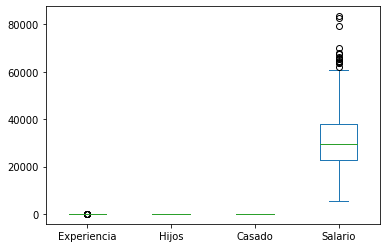

In [ ]:
#Visualizamos los Outliers
df.plot(kind="box")

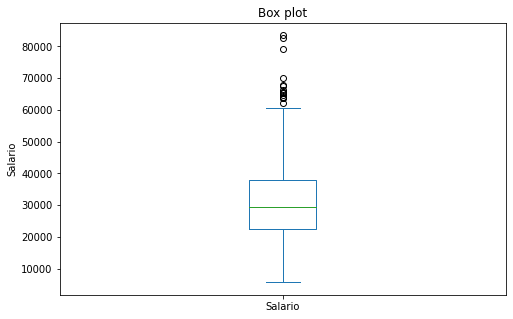

In [ ]:
#Outliers de la variable categorica Salario
df['Salario'].plot(kind='box', figsize=(8, 5))
plt.title('Box plot')
plt.ylabel('Salario')
plt.show()

In [ ]:
#Retiramos los Outliers
q1 = df['Salario'].quantile(0.25)
q3 = df['Salario'].quantile(0.75)
iqr = q3-q1 #Interquartile range    #*   Q1 (25%)     #*   Q3 (75%)    #*   IQR = Q3 - Q1     
lowV = q1-1.5*iqr
highV = q3+1.5*iqr

df = df.loc[(df['Salario'] > lowV) & (df['Salario'] < highV)]

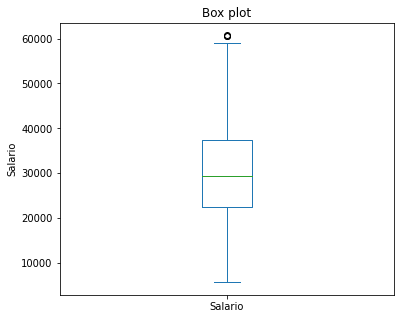

In [ ]:
#Grafica sin outliers
df['Salario'].plot(kind='box', figsize=(6, 5))
plt.title('Box plot')
plt.ylabel('Salario')
plt.show()

*Realizamos dummies a valores categóricos*

In [ ]:
#Aplicamos la función dummie para la variable categórica de Posición
df = pd.get_dummies(data = df, columns=['Posicion'])

In [ ]:
df.head(5)

,Experiencia,Hijos,Casado,Educacion,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
0,0.5,4,1,Bachillerato,13540,1,0,0
1,5.6,2,0,Licenciatura,31240,1,0,0
3,5.2,2,1,Licenciatura,29960,1,0,0
4,7.2,2,1,Licenciatura,34710,0,1,0
5,7.2,2,1,Bachillerato,32210,1,0,0


In [ ]:
#Aplicamos Label Encoder ya que Bachillerato, Licenciatura y Posgrado ya que es una  
#variable categorica a la que se le puede asignar un valor ordinal.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df['Educacion'] = labelencoder.fit_transform(df['Educacion'])

In [ ]:
df.head(3)

,Experiencia,Hijos,Casado,Educacion,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
0,0.5,4,1,0,13540,1,0,0
1,5.6,2,0,1,31240,1,0,0
3,5.2,2,1,1,29960,1,0,0


*Se separa los conjuntos de entrenamiento, «splitear» dataframe:*

In [ ]:
df.columns


Index(['Experiencia', 'Hijos', 'Casado', 'Educacion', 'Salario',
       'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente'],
      dtype='object')

In [ ]:
X = df[['Experiencia', 'Hijos', 'Casado', 'Educacion',
       'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente']]
y = df['Salario']

In [ ]:
df.describe()

,Experiencia,Hijos,Casado,Educacion,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,6.352183,1.445685,0.592893,0.563452,30208.548223,0.796954,0.153299,0.049746
std,2.532211,1.206075,0.491545,0.665867,10568.622163,0.402471,0.360459,0.217531
min,0.100000,0.000000,0.000000,0.000000,5630.000000,0.000000,0.000000,0.000000
25%,4.600000,0.000000,0.000000,0.000000,22450.000000,1.000000,0.000000,0.000000
50%,6.400000,1.000000,1.000000,0.000000,29340.000000,1.000000,0.000000,0.000000
75%,8.000000,2.000000,1.000000,1.000000,37360.000000,1.000000,0.000000,0.000000
max,15.200000,4.000000,1.000000,2.000000,60730.000000,1.000000,1.000000,1.000000


In [ ]:
df.corr()

,Experiencia,Hijos,Casado,Educacion,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
Experiencia,1.000000,-0.009387,-0.002837,-0.009259,0.656143,-0.000263,0.046674,-0.076855
Hijos,-0.009387,1.000000,0.325222,-0.001715,0.211429,-0.018556,-0.010048,0.050982
Casado,-0.002837,0.325222,1.000000,0.055716,0.079916,-0.027849,0.014185,0.028021
Educacion,-0.009259,-0.001715,0.055716,1.000000,0.242199,-0.270416,0.215596,0.143065
Salario,0.656143,0.211429,0.079916,0.242199,1.000000,-0.345727,0.200269,0.307801
Posicion_Analista,-0.000263,-0.018556,-0.027849,-0.270416,-0.345727,1.000000,-0.842996,-0.453294
Posicion_Coordinador,0.046674,-0.010048,0.014185,0.215596,0.200269,-0.842996,1.000000,-0.097357
Posicion_Gerente,-0.076855,0.050982,0.028021,0.143065,0.307801,-0.453294,-0.097357,1.000000


In [ ]:
#Spliteamos la orden en conjunto de entrenamiento y en conjunto de pruebas.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=1)

*Se estandarizan los conjuntos con standardScaler*

In [ ]:
#Escalamos los valores de X.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train

array([[ 1.0689923 , -1.16313834, -1.15881713, ..., -2.14264068,
         2.54057975, -0.21635275],
       [-1.27339582, -0.34794737,  0.86294893, ...,  0.46671381,
        -0.39361095, -0.21635275],
       [ 1.84978834,  1.28243458,  0.86294893, ...,  0.46671381,
        -0.39361095, -0.21635275],
       ...,
       [ 0.28819626,  1.28243458,  0.86294893, ..., -2.14264068,
         2.54057975, -0.21635275],
       [-0.37548037, -1.16313834,  0.86294893, ...,  0.46671381,
        -0.39361095, -0.21635275],
       [-0.21932116,  0.46724361,  0.86294893, ...,  0.46671381,
        -0.39361095, -0.21635275]])

*Se aplica el modelo de Regresión Lineal y entrenamiento al modelo*

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

LinearRegression(normalize=True)

In [ ]:
prediccion_y = modelo.predict(X_test)

In [ ]:
prediccion_y

array([21765.2027659 , 14847.29398624, 32361.24175115, 36809.00825109,
       20777.41525944, 41123.39952809, 30603.03118751, 12554.55206699,
       30831.41011596, 28240.86987387,  9732.88335222, 31550.29434087,
       41036.09957161, 10021.15521727, 38860.25390868, 31383.82203367,
       23775.92407039, 35014.14133314, 27242.06788824, 28085.41204585,
       26189.62421629, 24655.02935221, 42423.45063935, 27154.76793176,
       34257.02958071, 30585.1506254 , 31918.21331663, 48167.9575204 ,
       37498.29617617, 33377.92429889, 40859.25947543, 23052.27661659,
       33912.4556545 , 34072.67671141, 33055.99416367, 33486.60652353,
       34394.60684663, 30331.37836172, 19001.32413369, 18668.37951929,
       35915.89040596, 37313.94330686, 19623.15544578, 26207.50477839,
       24810.48718023, 34550.06467465, 29792.08377722, 54239.52405831,
       36964.46607911, 44358.50129917, 26775.69440417, 27154.76793176,
       28866.20289202, 32860.01198255, 26638.11713825, 12974.14994767,
      

In [ ]:
pd.DataFrame({'Realidad': y_test,
              'Prediccion': prediccion_y}).head()

,Realidad,Prediccion
968,19690,21765.202766
238,11080,14847.293986
489,39090,32361.241751
810,39310,36809.008251
734,25000,20777.415259


In [ ]:
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = prediccion_y,
            squared = False
           )
print("")
print(f"El error cuadrático medio de test es: {rmse_ols}")


El error cuadrático medio de test es: 6276.972216207822


In [ ]:
dfx = pd.DataFrame(X_train.T, X.columns)

In [ ]:
dfx = dfx.T

In [ ]:
dfx.head(3)

,Experiencia,Hijos,Casado,Educacion,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
0,1.068992,-1.163138,-1.158817,0.754614,-2.142641,2.540580,-0.216353
1,-1.273396,-0.347947,0.862949,0.754614,0.466714,-0.393611,-0.216353
2,1.849788,1.282435,0.862949,-0.818564,0.466714,-0.393611,-0.216353


In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': dfx.columns,
                         'coef': modelo.coef_.flatten()}
                  )


In [ ]:
modelo.coef_.shape

(7,)

In [ ]:
df_coeficientes

,predictor,coef
0,Experiencia,7506.059936
1,Hijos,2347.509306
2,Casado,-187.496237
3,Educacion,1186.701427
4,Posicion_Analista,-2015.240076
5,Posicion_Coordinador,538.597273
6,Posicion_Gerente,2848.650295


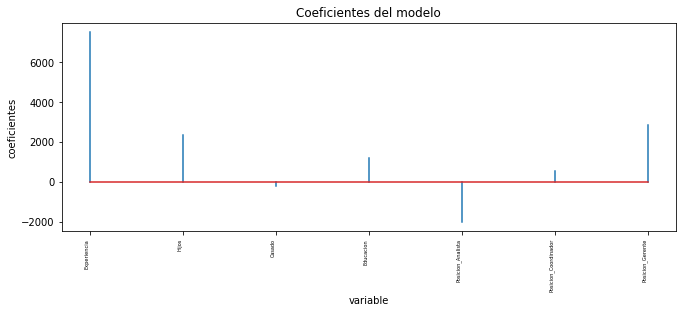

In [ ]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
modelo.coef_[0:6] 
#betas de la ecuacion

array([ 7506.05993566,  2347.50930554,  -187.4962368 ,  1186.70142673,
       -2015.24007629,   538.59727288])

In [ ]:
modelo.intercept_
#alfa de la ecuacion

28917.39837398374

In [ ]:
predicciones = modelo.predict(X_test)


In [ ]:
predicciones = predicciones.flatten()
predicciones[:250]

array([21765.2027659 , 14847.29398624, 32361.24175115, 36809.00825109,
       20777.41525944, 41123.39952809, 30603.03118751, 12554.55206699,
       30831.41011596, 28240.86987387,  9732.88335222, 31550.29434087,
       41036.09957161, 10021.15521727, 38860.25390868, 31383.82203367,
       23775.92407039, 35014.14133314, 27242.06788824, 28085.41204585,
       26189.62421629, 24655.02935221, 42423.45063935, 27154.76793176,
       34257.02958071, 30585.1506254 , 31918.21331663, 48167.9575204 ,
       37498.29617617, 33377.92429889, 40859.25947543, 23052.27661659,
       33912.4556545 , 34072.67671141, 33055.99416367, 33486.60652353,
       34394.60684663, 30331.37836172, 19001.32413369, 18668.37951929,
       35915.89040596, 37313.94330686, 19623.15544578, 26207.50477839,
       24810.48718023, 34550.06467465, 29792.08377722, 54239.52405831,
       36964.46607911, 44358.50129917, 26775.69440417, 27154.76793176,
       28866.20289202, 32860.01198255, 26638.11713825, 12974.14994767,
      

In [ ]:
X_test.shape

(739, 7)

In [ ]:
X_train.shape

(246, 7)

*Se predice el conjunto de pruebas de los 5 primeros valores reales y predichos*

In [ ]:
comp = pd.DataFrame({'Real': y_test,
                     'Predicción': predicciones})
comp.head(5)

,Real,Predicción
968,19690,21765.202766
238,11080,14847.293986
489,39090,32361.241751
810,39310,36809.008251
734,25000,20777.415259


*Se aplican las métricas de RMSE, MSE y R2*

In [ ]:
# RMSE - Para cada punto entre el real y prediccion 
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = True
           )
print("")
print(f"La raiz del error cuadrático medio de test es: {rmse_ols}")


La raiz del error cuadrático medio de test es: 39400380.203044936


In [ ]:
# MSE - Para cada punto entre el real y prediccion 
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error cuadrático medio de test es: {rmse_ols}")


El error cuadrático medio de test es: 6276.972216207822


In [ ]:
# Revisa la medida de R^2 de la regresión anterior
modelo.score(X_train,y_train)

0.7190746443069105

In [ ]:
modelo.score(X_test,y_test)

0.6349384074220812

# **Fin de la parte 1**
---

## **Segunda parte**

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_, 
  - estandarizar conjuntos, 
  - aplicar modelo, 
  - entrenar con conjunto de entrenamiento, 
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).
- Aplicar un modelo de clasificación diferente (el que quieras) e indicar su precisión
- Graficar un mapa de calor del cuadro de confusión del nuevo modelo (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.


# **Desarrollo de la parte númer 2**

---

Ahora se realizará una regresión logística a una nueva DF llamada df2

In [ ]:
# Importar datos
df2 = pd.read_csv('/content/drive/MyDrive/UCamp/rrhh_2.csv')


In [ ]:
df2.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


*Igual al anterior ejercicio comenzamos por limpiar outliers*

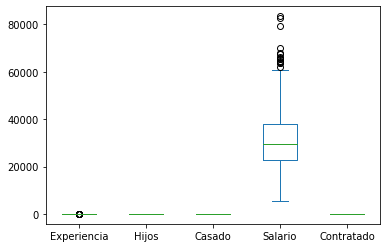

In [ ]:
df2.plot(kind="box")

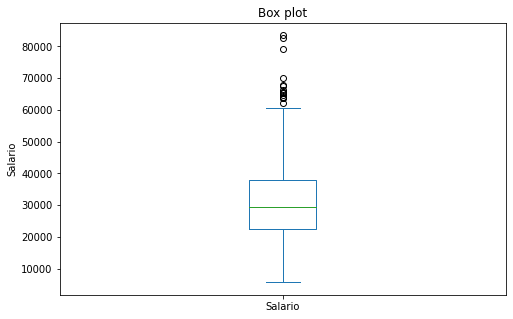

In [ ]:
df2['Salario'].plot(kind='box', figsize=(8, 5))
plt.title('Box plot')
plt.ylabel('Salario')
plt.show()

In [ ]:
q1 = df2['Salario'].quantile(0.25)
q3 = df2['Salario'].quantile(0.75)
iqr = q3-q1 #Interquartile range    #*   Q1 (25%)     #*   Q3 (75%)    #*   IQR = Q3 - Q1     
lowV = q1-1.5*iqr
highV = q3+1.5*iqr

df2 = df2.loc[(df2['Salario'] > lowV) & (df2['Salario'] < highV)]

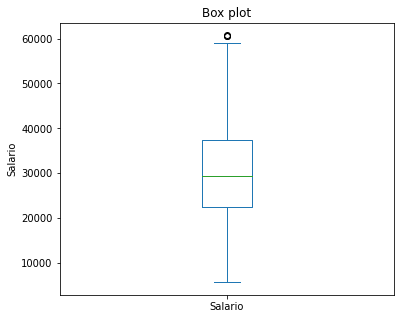

In [ ]:
df2['Salario'].plot(kind='box', figsize=(6, 5))
plt.title('Box plot')
plt.ylabel('Salario')
plt.show()

In [ ]:
df2.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1
5,7.2,Analista,2,1,Bachillerato,32210,0


*Aplicaremos dummies a las variables categóricas de la df2*

In [ ]:
#hacer dummies a valores categóricos,
#Aplicamos la función dummie para la variable categorica de Posición
df2 = pd.get_dummies(data = df2, columns=['Posicion'])

In [ ]:
df2.head()

,Experiencia,Hijos,Casado,Educacion,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
0,0.5,4,1,Bachillerato,13540,1,1,0,0
1,5.6,2,0,Licenciatura,31240,0,1,0,0
3,5.2,2,1,Licenciatura,29960,1,1,0,0
4,7.2,2,1,Licenciatura,34710,1,0,1,0
5,7.2,2,1,Bachillerato,32210,0,1,0,0


In [ ]:
df2['Educacion'] = labelencoder.fit_transform(df2['Educacion'])

In [ ]:
df2.head()

,Experiencia,Hijos,Casado,Educacion,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
0,0.5,4,1,0,13540,1,1,0,0
1,5.6,2,0,1,31240,0,1,0,0
3,5.2,2,1,1,29960,1,1,0,0
4,7.2,2,1,1,34710,1,0,1,0
5,7.2,2,1,0,32210,0,1,0,0


*Se realiza la separación de los conjuntos, creando un modelo para saber si el candidato sera contratado o no.*

In [ ]:
df2.columns

Index(['Experiencia', 'Hijos', 'Casado', 'Educacion', 'Salario', 'Contratado',
       'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente'],
      dtype='object')

In [ ]:
X = df2[['Experiencia', 'Hijos', 'Casado', 'Educacion', 'Salario',
       'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente']]
y = df2['Contratado']

In [ ]:
#«splitear» dataframe,
#Spliteamos la orden en conjunto de entrenamiento y en conjunto de pruebas.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=40)


In [ ]:
#estandarizar conjuntos,
#Escalamos los valores de X.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#aplicar modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() #Es importante asignarlo a un objeto para aplicarlo fácilmente.

In [ ]:
#entrenar con conjunto de entrenamiento,
#Entrenamos el modelo. Usa matrices para aplicar de forma sencilla.
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#predecir con conjunto de pruebas.
y_pred = model.predict(X_test)

*Se tiene el modelo entrenado con los conjuntos de entrenamiento, se aplica en las variables dependientes ( 𝑋 ) para obtener unas predicciones ( 𝑦̂  ).*

In [ ]:
#Trae valores de 0 y 1
y_pred

*Ahora mediremos la efectividad del modelo con la matriz de confusión, con los valores de acierto y no acierto.*

In [ ]:
#Aplicar cuadro de confusión y medir la precisión (2 puntos).
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[288,  89],
       [ 92, 319]])

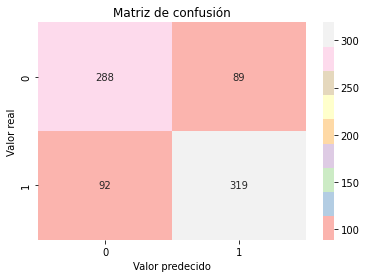

In [ ]:
#Graficar un mapa de calor del cuadro de confusión (2 puntos).
sns.heatmap(cm, annot= True, fmt= '.0f', cmap= 'Pastel1')
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

In [ ]:
#La eficiencia para saber si esta bien clasificado

(288 + 319)/(288 + 319 + 92 + 89)


0.7703045685279187

In [ ]:
#Aplicar un modelo de clasificación diferente (el que quieras) e indicar su precisión
# Importamos el modelo KNN para regresión de la siguiente manera y lo asignamos a un objeto.
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors= 3)

In [ ]:
#Entrenamos el modelo
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = modelo_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[302,  75],
       [ 70, 341]])

In [ ]:
#Graficar un mapa de calor del cuadro de confusión del nuevo modelo (2 puntos).

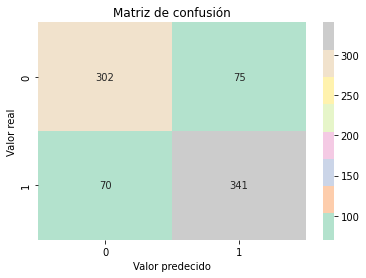

In [ ]:
sns.heatmap(cm_knn, annot= True, fmt= '.0f', cmap= 'Pastel2')
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

In [ ]:
#La eficiencia para saber si esta bien clasificado

(302 + 341)/(302 + 341 + 75 + 70)  

0.815989847715736

# **Fin de la parte 2**
---


> **Punto extra**


Indica el F1 *score* para los modelos de clasificación que has hecho y explícalos.

*Este* tema lo puedes revisar nuevamente en tu curso de la semana 11.

In [ ]:
#@title Se aplicará la métrica F1-Score

from sklearn.metrics import (precision_score, recall_score, f1_score, confusion_matrix)


*F1-Score para regresión logística*

In [ ]:
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))

	Precision: 0.782


In [ ]:
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.776


In [ ]:
print("\tF1: %1.3f" % f1_score(y_test, y_pred))

	F1: 0.779


*F1-Score para K-Nearest Neighbors*

In [ ]:
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred_knn))

	Precision: 0.820


In [ ]:
print("\tRecall: %1.3f" % recall_score(y_test, y_pred_knn))

	Recall: 0.830


In [ ]:
print("\tF1: %1.3f" % f1_score(y_test, y_pred_knn))

	F1: 0.825


*Valores F1-score cercanos a 1 nos permitiran afirmar que el modelo cumple con su objetivo, en este caso el modelo de clasificación de K-nearest neighbors nos da una mejor métrica como lo haría tambien la métrica de la eficiencia.*

# **Fin del apartado para la obtención del punto extra**
---